# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

In [2]:
! git clone https://github.com/ds4e/EDA

Cloning into 'EDA'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 59 (delta 11), reused 10 (delta 10), pack-reused 43 (from 1)
Receiving objects: 100% (59/59), 4.93 MiB | 18.50 MiB/s, done.
Resolving deltas: 100% (18/18), done.


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/EDA/assignment/data/ForeignGifts_edu.csv')

In [5]:
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [6]:
df['Foreign Gift Amount'].describe()

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


<Axes: >

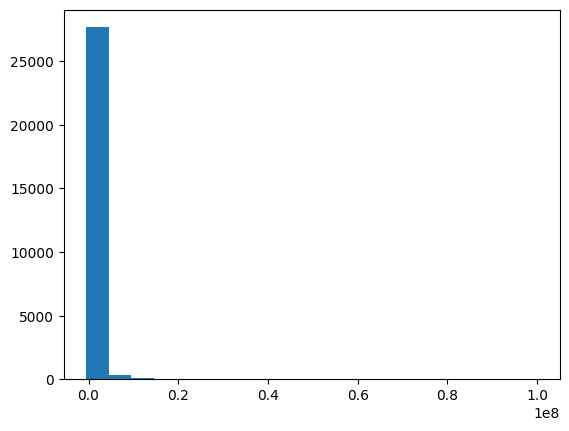

In [7]:
df['Foreign Gift Amount'].hist(bins=20,grid=False)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

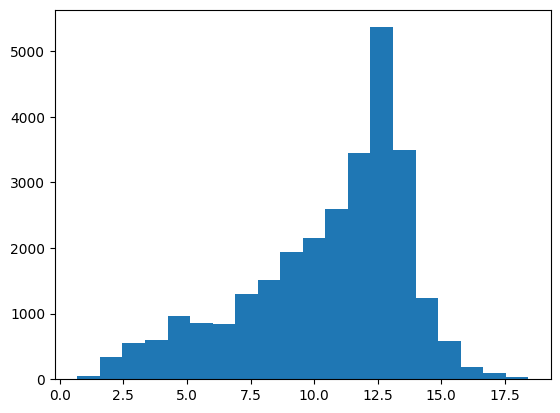

In [8]:
# this variable has a very long tail, so the above histogram is not very insightful - use the log instead
df['Foreign Gift Amount Log'] = np.log(df['Foreign Gift Amount'])
df.loc[df['Foreign Gift Amount Log']>0,'Foreign Gift Amount Log'].hist(bins=20,grid=False)

In [9]:
df['Gift Type'].value_counts(9)

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


About 61% of gifts are contract, 38% are monetary gifts, and a small 0.039% are real estate.

<Axes: ylabel='Density'>

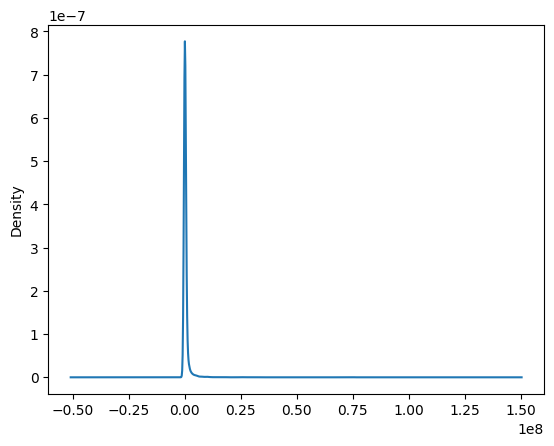

In [10]:
df['Foreign Gift Amount'].plot.density()

<Axes: ylabel='Density'>

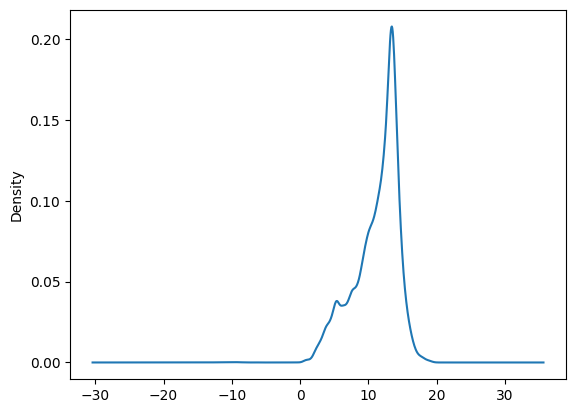

In [11]:
df['Foreign Gift Amount arcsinh']=np.arcsinh(df['Foreign Gift Amount'])
df['Foreign Gift Amount arcsinh'].plot.density()
# using the arcsinh method makes a more useful kernel density plot

<Axes: ylabel='Density'>

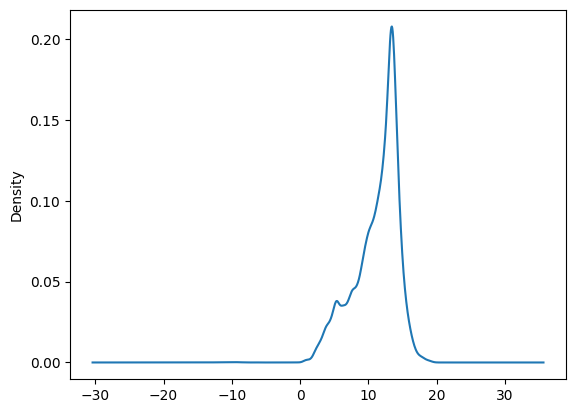

In [12]:
df['Foreign Gift Amount arcsinh'].plot.density()

[Text(0.5, 1.0, 'Grouped KDE Plot')]

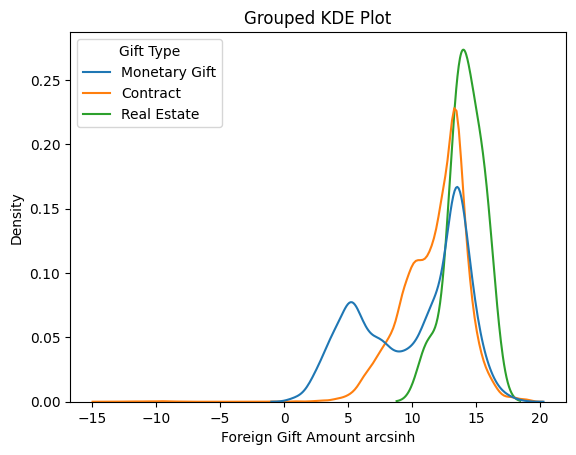

In [13]:
conditioning = 'Gift Type'
var = 'Foreign Gift Amount arcsinh'
sns.kdeplot( data=df, x=var, hue=conditioning, common_norm=False).set(title='Grouped KDE Plot')

For monetary gifts, there are two peaks - showing that some are lower value gifts. Real estate has a higher frequency at higher value amounts, and contract has a wider shape - indicating that it takes on many different values.

In [14]:
# top 15 countries in the number of gifts given
df['Country of Giftor'].value_counts().head(15)

,count
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [15]:
df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [16]:
df.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


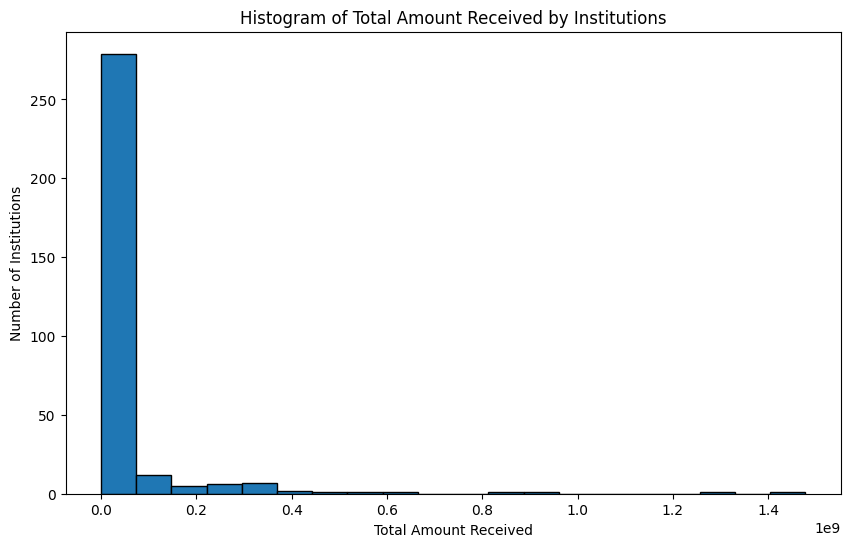

In [17]:
# Group by institution and sum the foreign gift amounts
institution_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()

plt.figure(figsize=(10, 6))
plt.hist(institution_totals, bins=20, edgecolor='black')

plt.xlabel('Total Amount Received')
plt.ylabel('Number of Institutions')
plt.title('Histogram of Total Amount Received by Institutions')

plt.show()

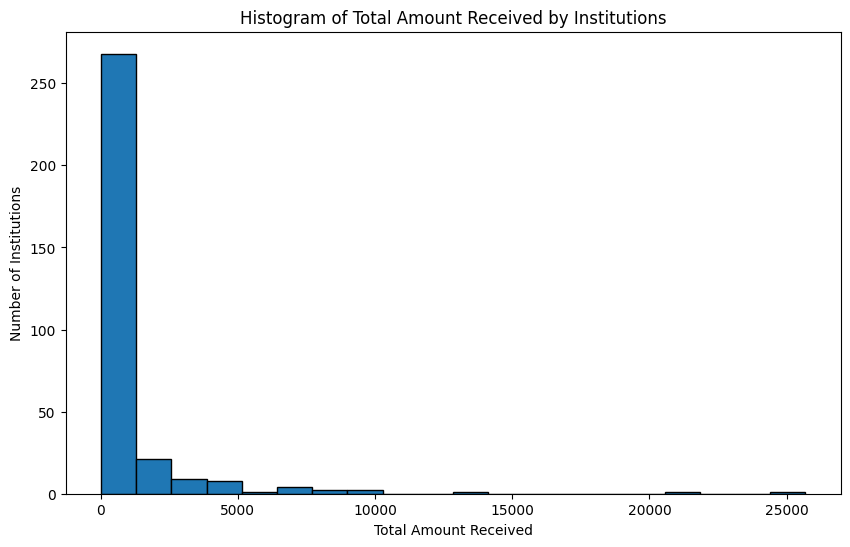

In [18]:
# using gift amount log
institution_totals = df.groupby('Institution Name')['Foreign Gift Amount Log'].sum()

plt.figure(figsize=(10, 6))
plt.hist(institution_totals, bins=20, edgecolor='black')

plt.xlabel('Total Amount Received')
plt.ylabel('Number of Institutions')
plt.title('Histogram of Total Amount Received by Institutions')

plt.show()

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [58]:
air = pd.read_csv('/content/EDA/assignment/data/airbnb_hw.csv')

In [59]:
air.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [60]:
air.shape
# we see that there are 13 columns and 30478 observations

(30478, 13)

In [61]:
pd.crosstab(air['Property Type'], air['Room Type'])
# if you are looking for a shared room, you are most likely going to find that in an apartment, house, or loft
# private rooms are more common than renting the entire property for these types of buildings: houses, dorms, B&Bs, tents, treehouses, chalets, castles, etc.

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


<Axes: >

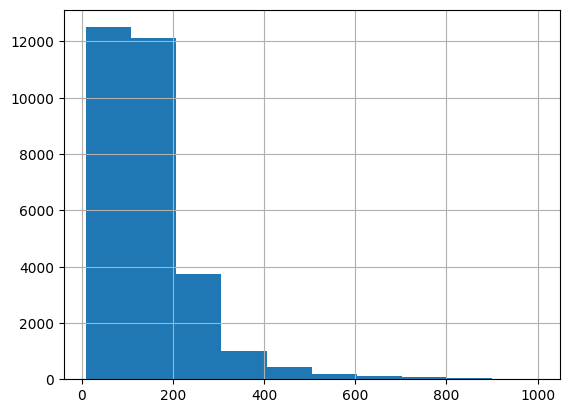

In [62]:
air['Price'] = pd.to_numeric(air['Price'],errors='coerce')
print(air['Price'].describe())
air['Price'].hist()

<Axes: ylabel='Density'>

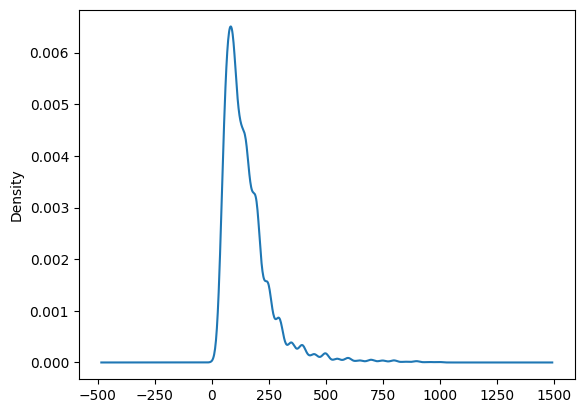

In [63]:
air['Price'].plot.density()

<Axes: >

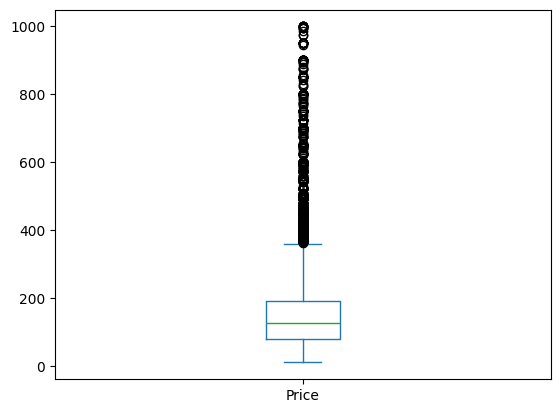

In [64]:
air['Price'].plot.box()

After making these plots, we see that there are many outliers. The max is 999, which likely is an entry to depict missing values.

<Axes: >

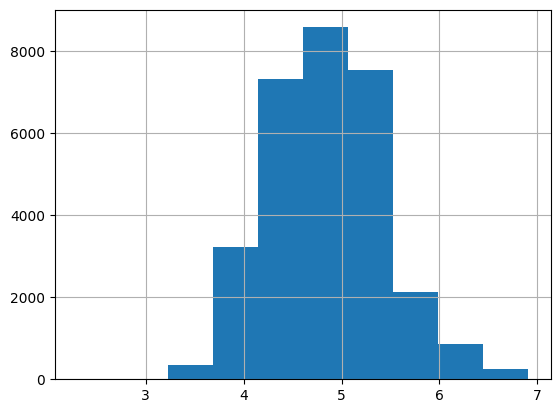

In [65]:
air['Price_log']= np.log(air['Price'])
air['Price_log'].hist()

<Axes: ylabel='Density'>

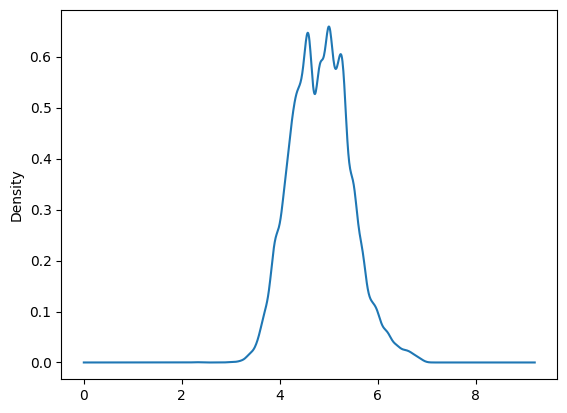

In [66]:
air['Price_log'].plot.density()

<Axes: >

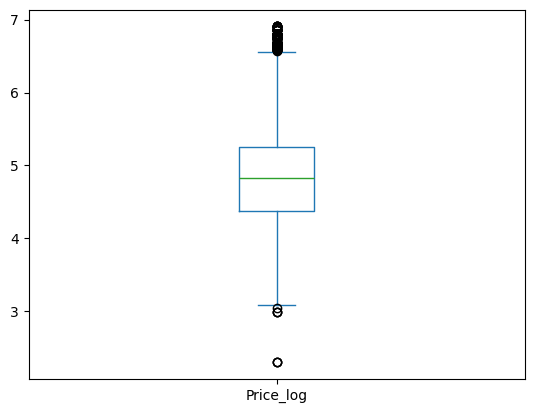

In [67]:
air['Price_log'].plot.box()

<Axes: xlabel='Beds', ylabel='Price_log'>

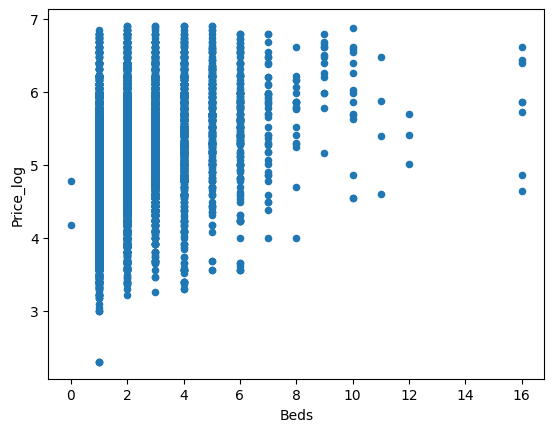

In [69]:
air.plot.scatter(y='Price_log',x='Beds')


In [70]:
air['Price_log'].groupby(air['Beds']).describe()
# average prices go up as the number of beds increases
# the standard deviation is higher for properties with more beds because there are far fewer observations of these large properties

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,4.476755,0.427613,4.174387,4.325571,4.476755,4.627939,4.779123
1.0,20307.0,4.682084,0.527569,2.302585,4.317488,4.605170,5.043425,6.856462
2.0,6561.0,5.077679,0.546961,3.218876,4.744932,5.075174,5.416100,6.906755
3.0,2029.0,5.297638,0.572851,3.258097,4.941642,5.298317,5.700444,6.906755
4.0,766.0,5.438240,0.666451,3.295837,5.010635,5.480639,5.896449,6.906755
5.0,274.0,5.596976,0.624868,3.555348,5.225704,5.652489,6.052089,6.902743
6.0,166.0,5.538625,0.712393,3.555348,5.212968,5.602112,5.988961,6.802395
7.0,45.0,5.617009,0.693481,4.007333,5.176150,5.703782,6.098074,6.802395
8.0,20.0,5.674340,0.579810,4.007333,5.386655,5.826995,6.012435,6.620073


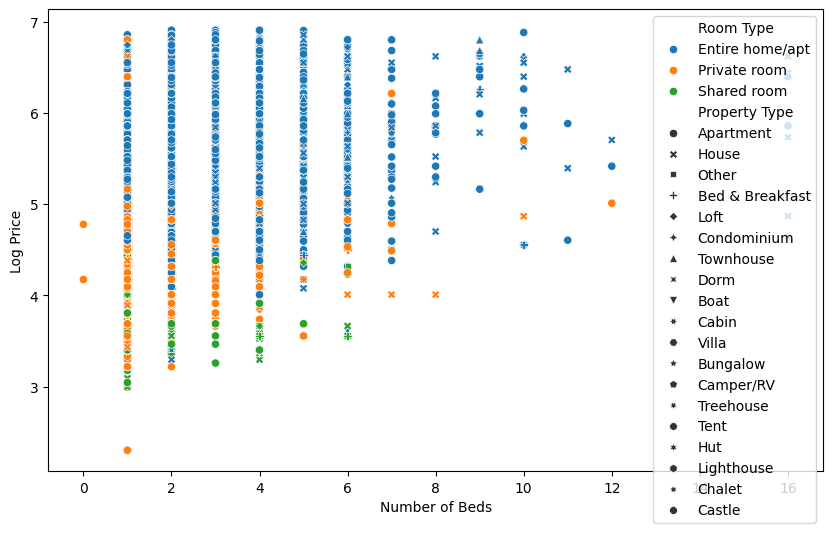

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=air, x='Beds', y='Price_log', hue='Room Type', style='Property Type')

# Labels and title
plt.xlabel('Number of Beds')
plt.ylabel('Log Price')

# Show the plot
plt.show()

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.